<a href="https://colab.research.google.com/github/selenumo/GraduationProject/blob/main/support_vector_machine_401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ele401/data_401/data_final.csv')

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,OutPut
0,0,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,9.960,16.92,7.600,25.039,18.05,25.039,18.750,17.840,14.920,1
1,1,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1
2,2,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1
3,3,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,9.990,11.78,18.590,25.280,18.57,14.590,12.820,19.370,15.920,1
4,4,2.90,3.42,3.81,4.580,3.560,4.250,3.86,3.530,3.410,...,10.370,15.32,13.510,12.230,14.68,16.350,16.819,16.819,16.819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,42367,11.56,7.15,9.18,7.510,7.310,8.110,7.29,9.500,5.580,...,15.022,7.78,15.022,7.930,6.54,7.270,12.920,10.030,7.760,0
42368,42368,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,2.030,2.09,2.060,1.940,2.08,1.960,2.090,1.930,2.080,0
42369,42369,15.35,15.76,12.32,4.540,14.700,20.230,18.31,22.426,22.426,...,10.390,9.58,8.770,14.330,19.82,18.650,17.460,10.150,16.730,0
42370,42370,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,...,16.907,8.61,15.510,11.560,10.82,14.180,7.920,8.930,8.170,0


In [5]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

The rows between 1000 and 10000 are determined as test data.

In [6]:
data = df[1000:10000]
#data.drop(['Unnamed: 0'],axis =1,inplace=True)
data.to_csv('/content/drive/MyDrive/ele401/data_401/test_data.csv')

In [7]:
Y = data['OutPut']
data.drop(['OutPut'],axis=1,inplace=True)

<ipython-input-7-597df0ed2d88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['OutPut'],axis=1,inplace=True)


##Full data

In [8]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [36]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
42367    0
42368    0
42369    0
42370    0
42371    0
Name: OutPut, Length: 42372, dtype: int64

In [9]:
#Count no of 1 in Y
count = 0;
for i in Y:
  if(i==1):
    count = count+1
print(count)


3615


In [10]:
# Count no of 0 in Y
len(Y)-count

38757

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,10.120,9.960,16.92,7.600,25.039,18.05,25.039,18.750,17.840,14.920
1,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000
2,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.000
3,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,6.500,9.990,11.78,18.590,25.280,18.57,14.590,12.820,19.370,15.920
4,2.90,3.42,3.81,4.580,3.560,4.250,3.86,3.530,3.410,0.850,...,16.819,10.370,15.32,13.510,12.230,14.68,16.350,16.819,16.819,16.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,11.56,7.15,9.18,7.510,7.310,8.110,7.29,9.500,5.580,6.280,...,15.022,15.022,7.78,15.022,7.930,6.54,7.270,12.920,10.030,7.760
42368,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,1.890,2.030,2.09,2.060,1.940,2.08,1.960,2.090,1.930,2.080
42369,15.35,15.76,12.32,4.540,14.700,20.230,18.31,22.426,22.426,21.640,...,10.710,10.390,9.58,8.770,14.330,19.82,18.650,17.460,10.150,16.730
42370,0.00,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,...,15.530,16.907,8.61,15.510,11.560,10.82,14.180,7.920,8.930,8.170


In [11]:
abn_x = df.iloc[4]
nor_x = df.iloc[33837]

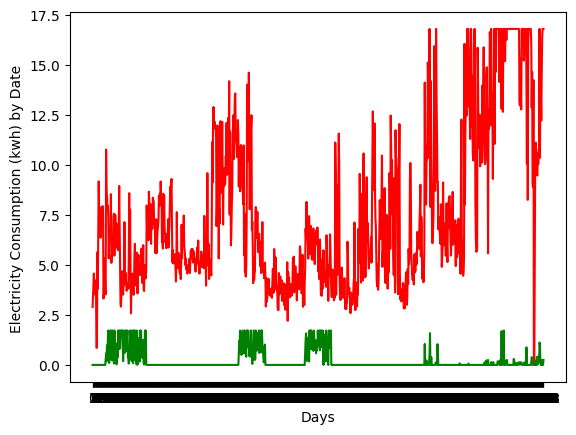

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(abn_x,'r-')
plt.plot(nor_x,'g-')
plt.xlabel('Days')
plt.ylabel('Electricity Consumption (kwh) by Date ')
plt.show()

In [12]:
x = np.array(df)
y = np.array(Y)

In [13]:
print(x.shape)
print(y.shape)

(42372, 1034)
(42372,)


1.test size = 0.15
0.1
0.25
0.50

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(38134, 1034)
(38134,)
(4238, 1034)
(4238,)


In [43]:
from sklearn import svm

1. test parameters c=100, degree=10, rbf
2.test param c=50, 1,gamma=2 c=1

In [44]:
clf = svm.SVC(gamma=0.5, C=10) #C = 100, degree = 10, kernel = 'rbf', 
clf.fit(x_train, y_train)

SVC(C=10, gamma=0.5)

In [47]:
y_pred = clf.predict(x_test)

The precision is intuitively the ability of the classifier not to label a negative sample as positive.
The recall is intuitively the ability of the classifier to find all the positive samples.

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3875
           1       0.00      0.00      0.00       363

    accuracy                           0.84      4238
   macro avg       0.45      0.46      0.46      4238
weighted avg       0.83      0.84      0.83      4238



In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.838839075035394

#save model

In [50]:
from joblib import dump, load
dump(clf, '/content/drive/MyDrive/ele401/final401/SVM.joblib')

['/content/drive/MyDrive/ele401/final401/SVM.joblib']

In [ ]:
!cp 'final_SVM.joblib' '/content/drive/MyDrive/ele401/final401/final_SVM.joblib'

cp: cannot stat 'final_SVM.joblib': No such file or directory


In [51]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [52]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  3555  out of  4238


In [53]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


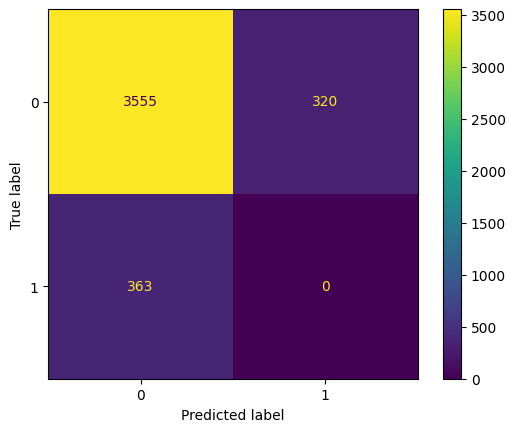

In [54]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
#plot_confusion_matrix(clf, x_test, y_test)
#plt.show()
disp.plot()
#plt.show()

Confusion matrix SVM@80
[[3555  320]
 [ 363    0]]
Normalized confusion matrix
[[3555  320]
 [ 363    0]]


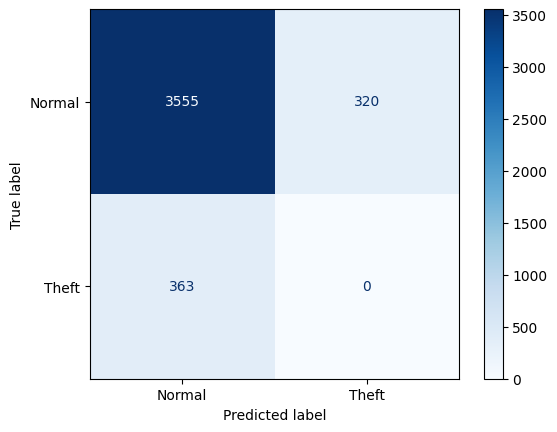

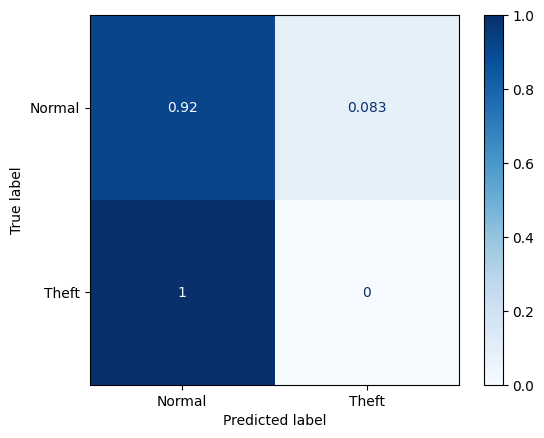

In [55]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix SVM@80", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test,display_labels=['Normal','Theft'],cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()